# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = combined_data_df["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID = "g989"
duplicated_mice_data = combined_data_df.loc[combined_data_df["Mouse ID"]== duplicated_mice_ID, :]
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df[combined_data_df["Mouse ID"] != duplicated_mice_ID]
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_table_df = cleaned_data_df.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tum_vol_mean = summary_stats_table_df["Tumor Volume (mm3)"].mean()
tum_vol_median = summary_stats_table_df["Tumor Volume (mm3)"].median()
tum_vol_variance = summary_stats_table_df["Tumor Volume (mm3)"].var()
tum_vol_stdev = summary_stats_table_df["Tumor Volume (mm3)"].std()
tum_vol_SEM = summary_stats_table_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume":tum_vol_mean,
    "Median Tumor Volume": tum_vol_median,
    "Tumor Volume Variance": tum_vol_variance,
    "Tumor Volume Std. Dev.": tum_vol_stdev,
    "Tumor Volume Std. Err.": tum_vol_SEM
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_adv = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
summary_df_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

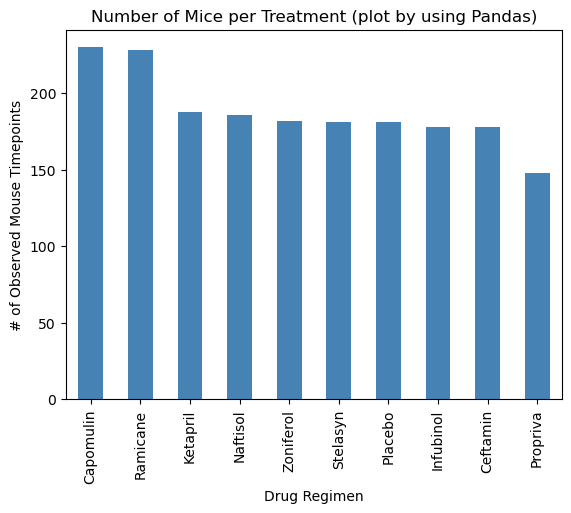

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_mice_per_treatment = cleaned_data_df["Drug Regimen"].value_counts()
#total_mice_per_treatment
plot_pandas = total_mice_per_treatment.plot(kind ="bar", color="steelblue")
plt.title("Number of Mice per Treatment (plot by using Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

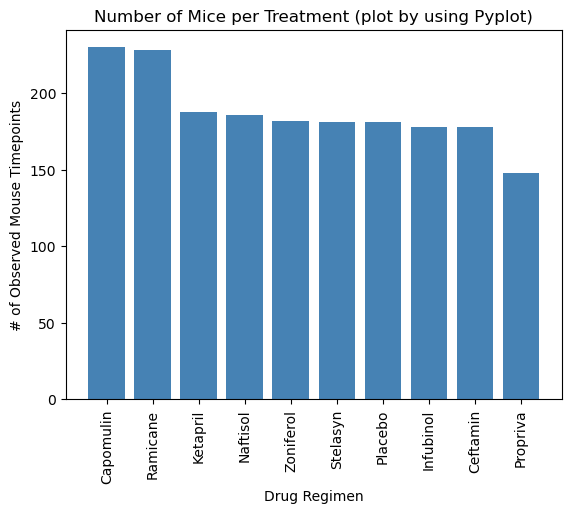

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(total_mice_per_treatment))
y_axis = total_mice_per_treatment.values
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and more
plt.bar(x_axis, y_axis, color="steelblue")
plt.xticks(tick_locations, total_mice_per_treatment.index, rotation="vertical")
plt.title("Number of Mice per Treatment (plot by using Pyplot)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

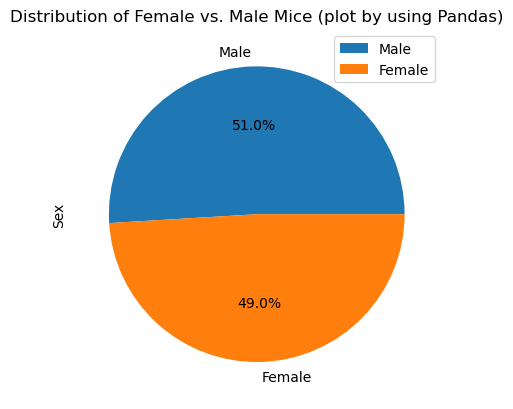

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data_df["Sex"].value_counts()
#gender_counts
gender_pie_pandas = gender_counts.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Female vs. Male Mice (plot by using Pandas)")
plt.ylabel("Sex")
plt.legend()
plt.show()

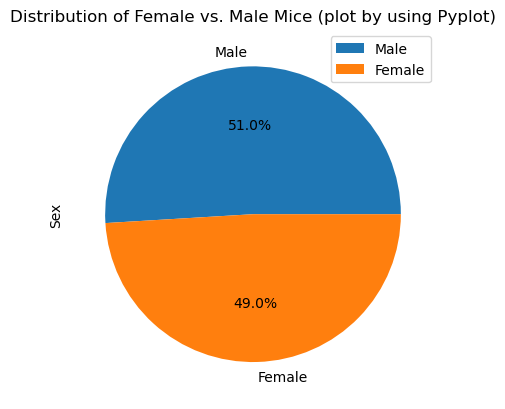

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, autopct="%1.1f%%", labels=gender_counts.index)
plt.title("Distribution of Female vs. Male Mice (plot by using Pyplot)")
plt.ylabel("Sex")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = cleaned_data_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoints = greatest_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_df = greatest_timepoints.merge(cleaned_data_df, on=["Mouse ID", "Timepoint"], how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug_regimen in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data_df.loc[merged_data_df["Drug Regimen"]== drug_regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound)|(tumor_vol > upper_bound)]
    outliers
    
    print(f"{drug_regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


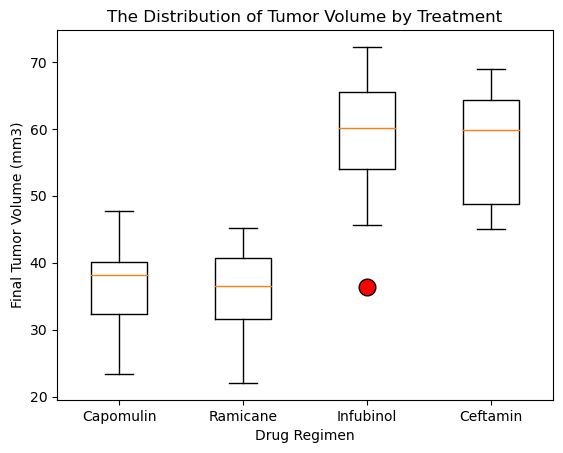

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='black')

ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("The Distribution of Tumor Volume by Treatment")
ax1.boxplot(tumor_vol_list, labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

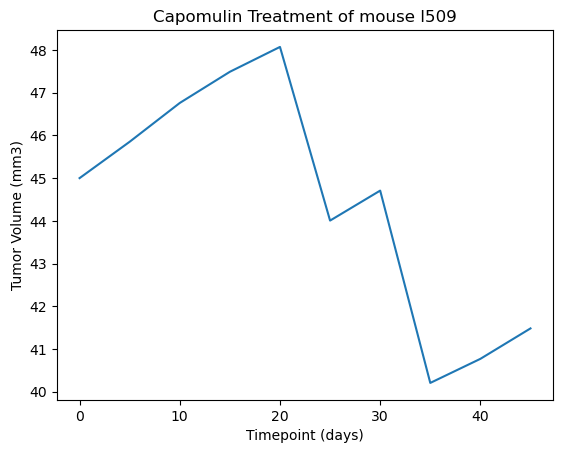

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data_df = cleaned_data_df[cleaned_data_df["Drug Regimen"]=="Capomulin"]
#capomulin_data_df

# Get the data for a specific Mouse ID = "l509" as shown in the stater code output
capomulin_mouse_l509 = capomulin_data_df.loc[capomulin_data_df["Mouse ID"]=="l509",:]
#capomulin_mouse_l509

x_axis_capomulin = capomulin_mouse_l509["Timepoint"]
y_axis_capomulin = capomulin_mouse_l509["Tumor Volume (mm3)"]

plt.plot(x_axis_capomulin, y_axis_capomulin)
plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

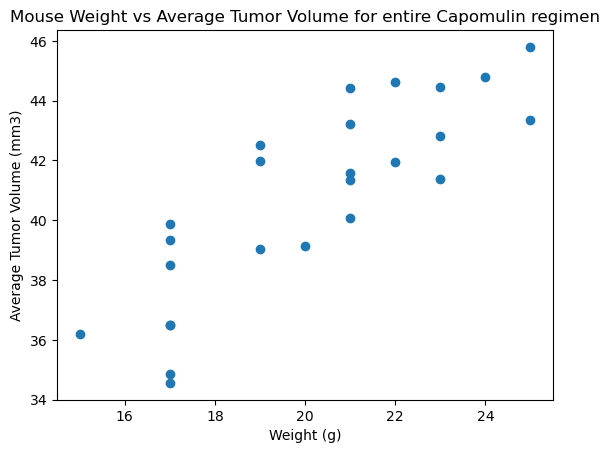

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# First, group DataFrame of mouse weight vs. the average observed tumor volume by Mouse ID then using agg()
# then calculate average (mean) of each Tumor Volume for each mouse, and take the first value of "Weight (g)" of each mouse
grouped_capomulin_df = capomulin_data_df.groupby(["Mouse ID"]).aggregate({"Tumor Volume (mm3)":"mean", "Weight (g)": "first"})
#print(grouped_capomulin_df)

x_values = grouped_capomulin_df["Weight (g)"]
y_values = grouped_capomulin_df["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for entire Capomulin regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is 0.84
The regression equation is: y = 0.95x + 21.55


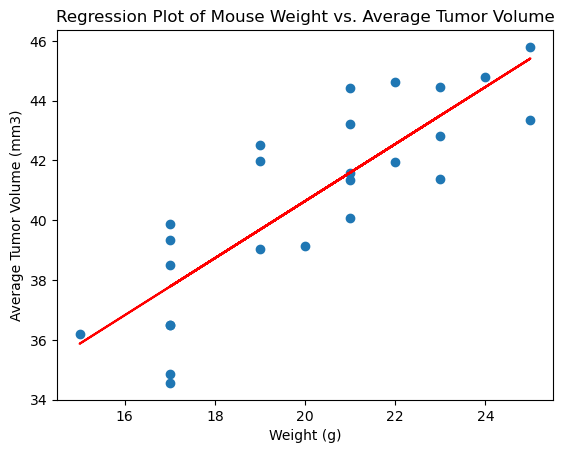

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(grouped_capomulin_df["Weight (g)"], grouped_capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average observed tumor volume is {round(correlation[0],2)}")

# Perform a linear regression on Weight vs. Average Tumor Volume
# x_values = grouped_capomulin_df["Weight (g)"]
# y_values = grouped_capomulin_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2))+"x + " + str(round(intercept,2))
print(f"The regression equation is: {line_eq}")

fig2, ax2 = plt.subplots()
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Regression Plot of Mouse Weight vs. Average Tumor Volume")

plt.show()